# Checkout these weird blob energy particles

They're 0.2 MeV blob1 and blob2 energies. Imply something odd going on.

In [1]:
# load in the data


# import stuff
import sys,os,os.path
import csv
import traceback
#sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/scratch/halmazan/NEXT/IC_alter-blob-centre/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/scratch/halmazan/NEXT/testing/notebooks/FOM_creator/")
os.environ['ICTDIR']='/scratch/halmazan/NEXT/IC_alter-blob-centre/'

from invisible_cities.core.core_functions   import shift_to_bin_centers
from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer

from concurrent.futures import ProcessPoolExecutor


import FOM_functions as FOM_func
import functions_HE as func
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

In [2]:
def load_single_file(file_path):
    '''
    Load data from a single h5 file and produce dataframes for /Tracking/Tracks

    Args:
        file_path       :       str
                                Path to the h5 file to be loaded.

    Returns:
        tracks_df       :       pandas.DataFrame
                                DataFrame containing the /Tracking/Tracks data.
    '''
    try: 
        tracks_df = load_dst(file_path, 'MC', 'particles')
        return tracks_df
    except Exception as e:
        print(f'File {file_path} broke with error:\n{e}', flush = True)
        x = pd.DataFrame()
        return x

## FUNCTIONS ##

def load_data_fast(folder_path):
    '''
    Load multiple h5 files and produce concatenated dataframes for /Tracking/Tracks, /MC/Particles, and their corresponding eventmap.

    Args:
        folder_path     :       str
                                Path to the folder containing the h5 files.

    Returns:
        tracks          :       pandas.DataFrame
                                Concatenated DataFrame containing the /Tracking/Tracks data from all h5 files.
        
        particles       :       pandas.DataFrame
                                Concatenated DataFrame containing the /MC/particles data from all h5 files, with the 'event_id' column modified.

        eventmap        :       pandas.DataFrame
                                Concatenated DataFrame containing the event map from all h5 files.
    '''
    
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
    file_paths = [os.path.join(folder_path, f) for f in file_names]

    # Use ProcessPoolExecutor to parallelize the data loading process
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(load_single_file, file_paths))
    
    # Separate the results into respective lists
    tracks_list = results

    # Concatenate all the dataframes at once
    tracks = pd.concat(tracks_list, axis=0, ignore_index=True)

    return tracks

In [3]:
mc_path = '/data/halmazan/NEXT/N100_LPR_MC/250925/thekla/456018/' # then the ldcs

In [4]:
# load in the funky blobs path
funky_evts = np.load('/scratch/halmazan/NEXT/testing/notebooks/MC_truth_FOM/FOM_funky_blobs_2s.npy')
display(funky_evts)

array([ 14556067,  12348063,   9216047, ..., 128268089, 131160014,
       136512016])

In [5]:
funk_MC   = []
funk_hits = []

# couple of LDCs to speed it up
for LDC in tqdm(range(1,2)):
# load in single file
    print(f'LDC{LDC}')
    full_path = f'{mc_path}ldc{LDC}/'

    file_names = [f for f in os.listdir(full_path) if os.path.isfile(os.path.join(full_path, f)) and f.endswith('.h5')]
    print(file_names)

    for file in file_names:
        specific_path = f'{full_path}/{file}'

        try:
            hits_df = pd.read_hdf(f'{specific_path}', 'MC/hits')
            MC_df   = load_single_file(specific_path)
            # take only events within funky_events
            MC_df_funky = MC_df[MC_df.event_id.isin(funky_evts)]
            hits_df_funky = hits_df[hits_df.event_id.isin(funky_evts)]
        except:
            print('File broke, dont really care why')
        
        if not MC_df_funky.empty:
            #print(f'Not empty at {file}')
            funk_MC.append(MC_df_funky)
            funk_hits.append(hits_df_funky)

  0%|                                                                                               | 0/1 [00:00<?, ?it/s]

LDC1
['NEXT100_Tl208_Port1a_sophronia_18892_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18159_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1066_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1549_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1487_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18436_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1663_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1253_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_154_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18999_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1567_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1312_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18221_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18640_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1396_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_3525_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_65_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1304_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1737_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1106_thekla.h5', 'NEXT100_Tl

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [18:09<00:00, 1089.29s/it]


In [6]:
funk_MC   = pd.concat(funk_MC)
funk_hits = pd.concat(funk_hits)

In [23]:
display(funk_MC)
display(funk_hits)

event_id  particle_id    particle_name  primary  mother_id   initial_x  \
5944  12804066            1            Tl208     True          0  398.998535   
5945  12804066            4               e-    False          1  398.998535   
5946  12804066            3        anti_nu_e    False          1  398.998535   
5947  12804066            2  Pb208[3197.711]    False          1  398.998535   
5948  12804066            6            gamma    False          2  398.998535   
...        ...          ...              ...      ...        ...         ...   
3326   8064030        62905               e-    False      62721  128.194382   
3327   8064030        62904               e-    False      62721  128.194382   
3328   8064030        66657               e-    False         41  135.823685   
3329   8064030           41               e-    False         40  212.484558   
3330   8064030           39            Pb208    False         27  399.018433   

       initial_y   initial_z  initial_t     final_x  ...  initial_momentum_x  \
5944  401.246857  564.353210   0.000000  398.998535  ...            0.000000   
5945  401.246857  564.353210   0.000443  398.952728  ...           -0.980368   
5946  401.246857  564.353210   0.000443  453.077332  ...            0.003742   
5947  401.246857  564.353210   0.000443  398.998535  ...            0.976624   
5948  401.246857  564.353210   0.000443 -219.794342  ...           -0.376546   
...          ...         ...        ...         ...  ...                 ...   
3326  182.065460  504.660950   2.421659  128.195023  ...            0.000291   
3327  182.065460  504.660950   2.421659  128.194290  ...            0.009224   
3328  181.454132  507.910217   2.524021  135.730850  ...            0.035292   
3329  227.385040  437.231140   0.952767  137.423264  ...            0.508452   
3330  401.388489  563.802002   0.002887  399.018433  ...            1.712606   

      initial_momentum_y  initial_momentum_z final_momentum_x  \
5944            0.000000            0.000000         0.000000   
5945            0.451827            0.635974        -0.000000   
5946           -0.487381            0.825991         0.003742   
5947            0.035554           -1.461962         0.000000   
5948            0.332191            0.296598         0.000000   
...                  ...                 ...              ...   
3326            0.018328           -0.011096         0.000000   
3327           -0.000938           -0.023677        -0.000000   
3328            0.027052            0.138042         0.000000   
3329           -0.964766           -1.021068         0.000000   
3330            1.597562            1.162073         0.000000   

     final_momentum_y  final_momentum_z  kin_energy        length  \
5944         0.000000          0.000000    0.000000      0.000000   
5945        -0.000000         -0.000000    0.842091      0.694112   
5946        -0.487381          0.825991    0.959070  13858.649414   
5947         0.000000         -0.000000    0.000008      0.000000   
5948        -0.000000         -0.000000    0.583188   1087.603394   
...               ...               ...         ...           ...   
3326         0.000000         -0.000000    0.000449      0.003182   
3327         0.000000         -0.000000    0.000632      0.004648   
3328        -0.000000          0.000000    0.020182      0.800959   
3329         0.000000         -0.000000    1.067923    420.565277   
3330         0.000000          0.000000    0.000018      0.000003   

          creator_proc        final_proc  
5944              none  RadioactiveDecay  
5945  RadioactiveDecay         NoProcess  
5946  RadioactiveDecay    Transportation  
5947  RadioactiveDecay  RadioactiveDecay  
5948  RadioactiveDecay              phot  
...                ...               ...  
3326              phot         NoProcess  
3327              phot         NoProcess  
3328             eIoni         NoProcess  
3329              conv         NoProcess  
3

event_id  particle_id  hit_id           x           y           z  \
75332  12804066           28       0  211.453415  350.678162  505.972687   
75333  12804066           27       0  210.524445  350.349731  505.805481   
75334  12804066           27       1  209.574066  350.068542  505.712067   
75335  12804066           27       2  208.798218  349.491974  505.857941   
75336  12804066           27       3  208.017044  348.950836  506.165833   
...         ...          ...     ...         ...         ...         ...   
35647   8064030           41     482  137.412689  181.023804  509.312378   
35648   8064030           41     483  137.416428  181.022400  509.312408   
35649   8064030           41     484  137.419510  181.025162  509.311829   
35650   8064030           41     485  137.422989  181.025879  509.311432   
35651   8064030           41     486  137.423264  181.027649  509.311310   

           time    energy   label  
75332  0.886584  0.000002  ACTIVE  
75333  0.680732  0.001940  ACTIVE  
75334  0.684452  0.004842  ACTIVE  
75335  0.688108  0.002333  ACTIVE  
75336  0.691846  0.002267  ACTIVE  
...         ...       ...     ...  
35647  2.589452  0.000075  ACTIVE  
35648  2.589562  0.000012  ACTIVE  
35649  2.589677  0.002108  ACTIVE  
35650  2.589831  0.000746  ACTIVE  
35651  2.589931  0.000925  ACTIVE  

[1915400 rows x 9 columns]

In [8]:
!pwd

/scratch/halmazan/NEXT/testing/notebooks


In [9]:
# save the files
with pd.HDFStore("MC_truth_FOM/funky_small.h5", mode="w") as store:
    store["MC"] = funk_MC
    store["hits"] = funk_hits

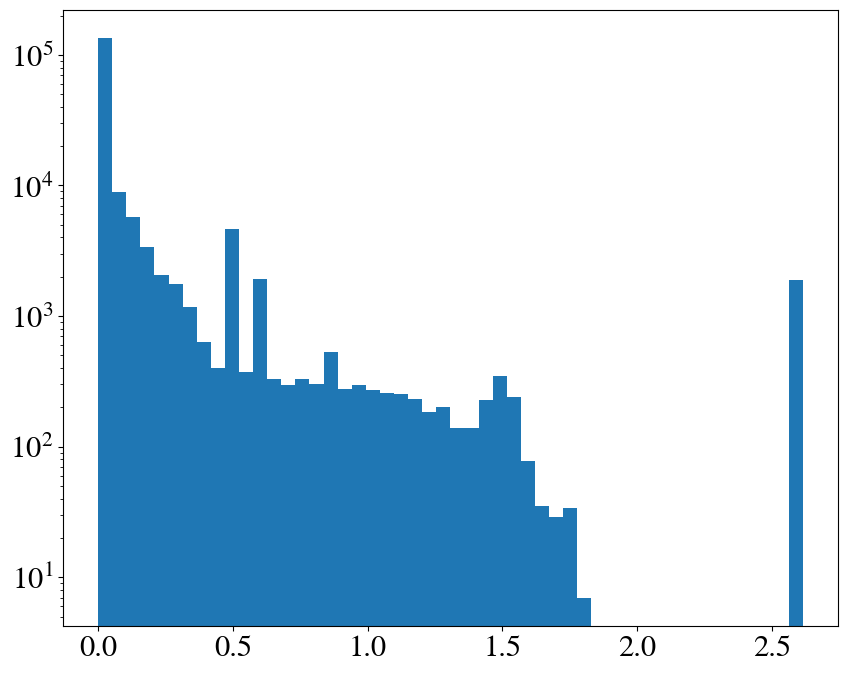

In [10]:
plt.hist(funk_MC.kin_energy, bins = 50)
plt.yscale('log')
plt.show()

event 15660095: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
8811  15660095            1            Tl208     True          0  398.615417   
8812  15660095            4               e-    False          1  398.615417   
8813  15660095            3        anti_nu_e    False          1  398.615417   
8814  15660095            2  Pb208[3475.078]    False          1  398.615417   
8815  15660095            6            gamma    False          2  398.615417   
8816  15660095           19               e-    False          6  426.906708   
8817  15660095           18               e-    False          6  426.906708   
8818  15660095           17               e-    False          6  426.906708   
8819  15660095           16               e-    False          6  426.906708   
8820  15660095           15               e-    False          6  426.906708   
8821  15660095           14               e-    False          6  424.883942   
8822  15660095           13               e-    False          6  420.431396   
8823  15660095           12               e-    False          6  412.692169   
8824  15660095           11               e-    False          6  412.692169   
8825  15660095           10               e-    False          6  412.692169   
8826  15660095            9            gamma    False          6  412.692169   
8827  15660095           22               e-    False          9  412.691650   
8828  15660095           21               e-    False          9  412.691650   
8829  15660095           20               e-    False          9  412.691650   
8830  15660095            8               e-    False          6  412.692169   
8831  15660095            7               e-    False          6  430.905853   
8832  15660095            5  Pb208[2614.522]    False          2  398.615417   
8833  15660095           24            gamma    False          5  398.615417   
8834  15660095           27            Xe131    False         24 -217.744339   
8835  15660095        18670               e-    False         26 -343.882568   
8836  15660095        23904               e-    False         26 -310.444641   
8837  15660095        46419               e-    False         26 -229.395370   
8838  15660095        52500               e-    False      50233 -207.208710   
8839  15660095        57435               e-    False      50233 -203.787094   
8840  15660095        50233               e-    False         26 -204.005463   
8841  15660095        64348               e-    False         26 -208.155411   
8842  15660095        65936               e-    False         26 -210.456879   
8843  15660095           26               e+    False         24 -217.744339   
8844  15660095        68153            gamma    False         26 -210.260208   
8845  15660095        68168               e-    False      68153 -235.051559   
8846  15660095        68167               e-    False      68153 -235.051559   
8847  15660095        68166               e-    False      68153 -235.051559   
8848  15660095        68165               e-    False      68153 -235.051559   
8849  15660095        68164               e-    False      68153 -235.051559   
8850  15660095        68163               e-    False      68153 -235.051559   
8851  15660095        68162               e-    False      68153 -235.051559   
8852  15660095        68161               e-    False      68153 -235.051559   
8853  15660095        68160               e-    False      68153 -235.051559   
8854  15660095        68159               e-    False      68153 -235.051559   
8855  15660095        68158               e-    False      68153 -235.051559   
8856  15660095        68157               e-    False      68153 -491.424286   
8857  15660095        68156               e-    False      68153 -491.424286   
8858  15660095        68155               e-    False      68153 -516.283203   
8859  15660095        68154               e-    False      68153 -516.283203   
8860  

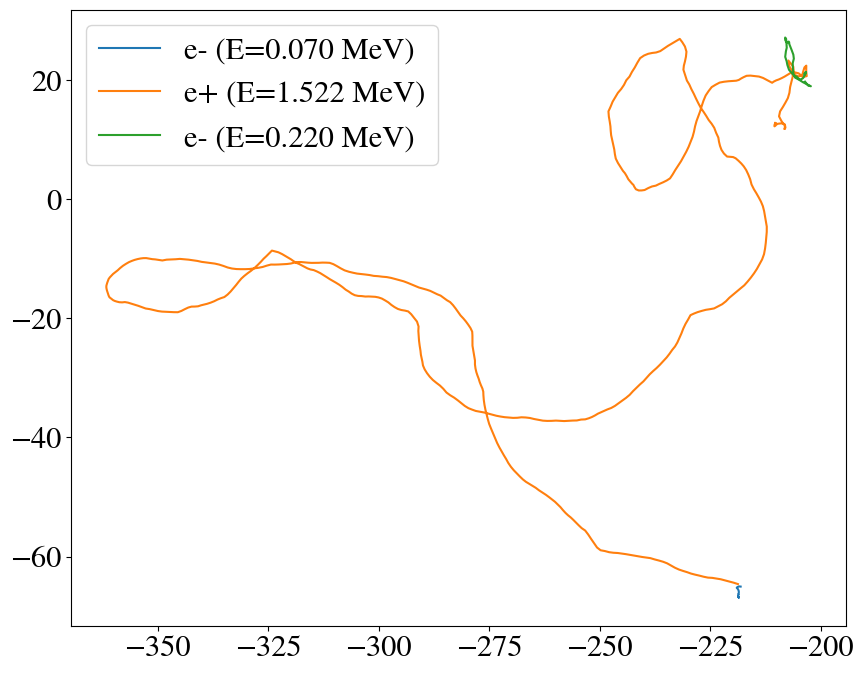

event 12504080: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
7737  12504080            1            Tl208     True          0  398.426636   
7738  12504080            4               e-    False          1  398.426636   
7739  12504080            5            gamma    False          4  398.462799   
7740  12504080           10               e-    False          5  398.492950   
7741  12504080            9               e-    False          5  398.492950   
7742  12504080            8               e-    False          5  398.492950   
7743  12504080            7            gamma    False          5  398.492950   
7744  12504080           14               e-    False          7  398.489807   
7745  12504080           13               e-    False          7  398.489807   
7746  12504080           12               e-    False          7  398.489807   
7747  12504080           11               e-    False          7  398.489807   
7748  12504080            6               e-    False          5  398.492950   
7749  12504080            3        anti_nu_e    False          1  398.426636   
7750  12504080            2  Pb208[3197.711]    False          1  398.426636   
7751  12504080           16            gamma    False          2  398.426636   
7752  12504080           25               e-    False         16  503.076660   
7753  12504080           24               e-    False         16  503.076660   
7754  12504080           23               e-    False         16  503.076660   
7755  12504080           22               e-    False         16  503.076660   
7756  12504080           21               e-    False         16  503.076660   
7757  12504080           20               e-    False         16  504.473511   
7758  12504080           19               e-    False         16  504.473511   
7759  12504080           18               e-    False         16  457.890930   
7760  12504080           17               e-    False         16  457.890930   
7761  12504080           15  Pb208[2614.522]    False          2  398.426636   
7762  12504080           27            gamma    False         15  398.426636   
7763  12504080           30            Xe132    False         27  156.627380   
7764  12504080         6747               e-    False         29  204.304825   
7765  12504080        10599               e-    False         29  209.232498   
7766  12504080        20064               e-    False         29  207.570312   
7767  12504080           29               e+    False         27  156.627380   
7768  12504080        25268            gamma    False         29  205.527008   
7769  12504080        25272               e-    False      25268 -104.614120   
7770  12504080        25271            gamma    False      25268 -104.614120   
7771  12504080        25277               e-    False      25271 -104.663017   
7772  12504080        25276               e-    False      25271 -104.663017   
7773  12504080        25275               e-    False      25271 -104.663017   
7774  12504080        25274               e-    False      25271 -104.663017   
7775  12504080        25273               e-    False      25271 -104.663017   
7776  12504080        25270               e-    False      25268 -104.614120   
7777  12504080        25278            gamma    False      25270 -104.658813   
7778  12504080        25281               e-    False      25278 -105.265549   
7779  12504080        25280               e-    False      25278 -105.265549   
7780  12504080        25279               e-    False      25278 -105.265549   
7781  12504080        25269               e-    False      25268  -66.872803   
7782  12504080        25267            gamma    False         29  205.527008   
7783  12504080        25293               e-    False      25267  417.629791   
7784  12504080        25292               e-    False      25267  417.629791   
7785  12504080        25291               e-    False      25267  417.629791   
7786  

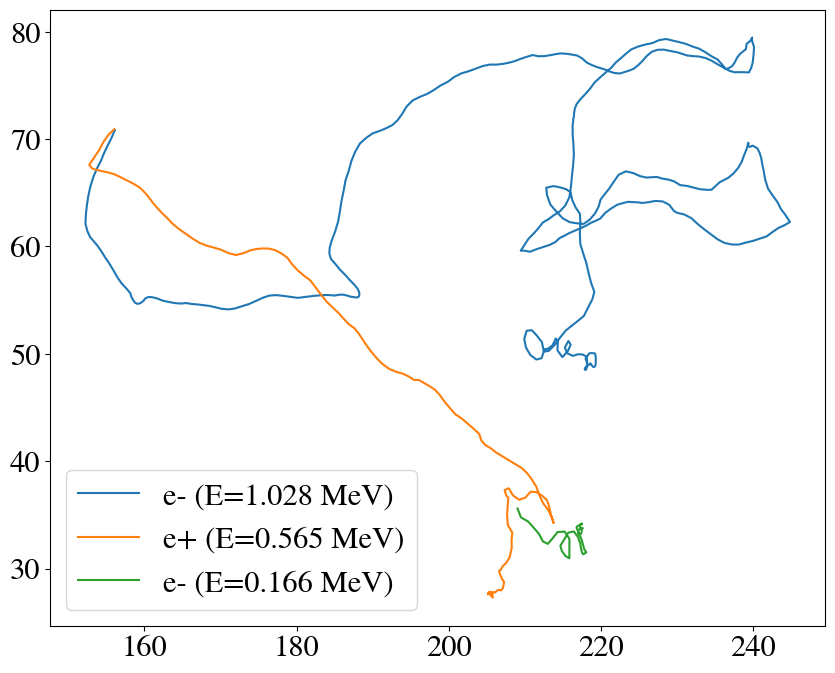

event 13224022: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
2232  13224022            1            Tl208     True          0  398.995575   
2233  13224022            4               e-    False          1  398.995575   
2234  13224022            3        anti_nu_e    False          1  398.995575   
2235  13224022            2  Pb208[3708.451]    False          1  398.995575   
2236  13224022            6            gamma    False          2  398.995575   
2237  13224022           16               e-    False          6  414.439392   
2238  13224022           15               e-    False          6  414.439392   
2239  13224022           14            gamma    False          6  414.439392   
2240  13224022           21               e-    False         14  414.434937   
2241  13224022           20               e-    False         14  414.434937   
2242  13224022           19               e-    False         14  414.434937   
2243  13224022           18               e-    False         14  414.434937   
2244  13224022           17               e-    False         14  414.434937   
2245  13224022           13               e-    False          6  414.439392   
2246  13224022           12               e-    False          6  411.980591   
2247  13224022           11               e-    False          6  411.980591   
2248  13224022           10               e-    False          6  403.762421   
2249  13224022            9               e-    False          6  402.133636   
2250  13224022            8               e-    False          6  402.133636   
2251  13224022            7               e-    False          6  402.133636   
2252  13224022            5  Pb208[3197.711]    False          2  398.995575   
2253  13224022           23            gamma    False          5  398.995575   
2254  13224022           38               e-    False         23  388.024475   
2255  13224022           37               e-    False         23  388.024475   
2256  13224022           36               e-    False         23  388.024475   
2257  13224022           35               e-    False         23  388.024475   
2258  13224022           34               e-    False         23  388.024475   
2259  13224022           33               e-    False         23  388.024475   
2260  13224022           32               e-    False         23  383.589844   
2261  13224022           31               e-    False         23  384.873505   
2262  13224022           30               e-    False         23  388.807404   
2263  13224022           29               e-    False         23  388.807404   
2264  13224022           28               e-    False         23  388.807404   
2265  13224022           27               e-    False         23  388.807404   
2266  13224022           26               e-    False         23  388.807404   
2267  13224022           25               e-    False         23  388.807404   
2268  13224022           24               e-    False         23  388.807404   
2269  13224022           22  Pb208[2614.522]    False          5  398.995575   
2270  13224022           40            gamma    False         22  398.995575   
2271  13224022           43            Xe129    False         40  124.331917   
2272  13224022         5146               e-    False         42   69.771561   
2273  13224022        17473               e-    False         42   -6.450363   
2274  13224022        28602               e-    False         42  -16.571915   
2275  13224022        37342               e-    False         42  -17.809010   
2276  13224022        65817               e-    False         42  -76.566490   
2277  13224022        65816               e-    False         42  -76.566490   
2278  13224022        65815               e-    False         42  -76.566490   
2279  13224022        65814               e-    False         42  -76.566490   
2280  13224022        65813               e-    False         42  -76.566490   
2281  

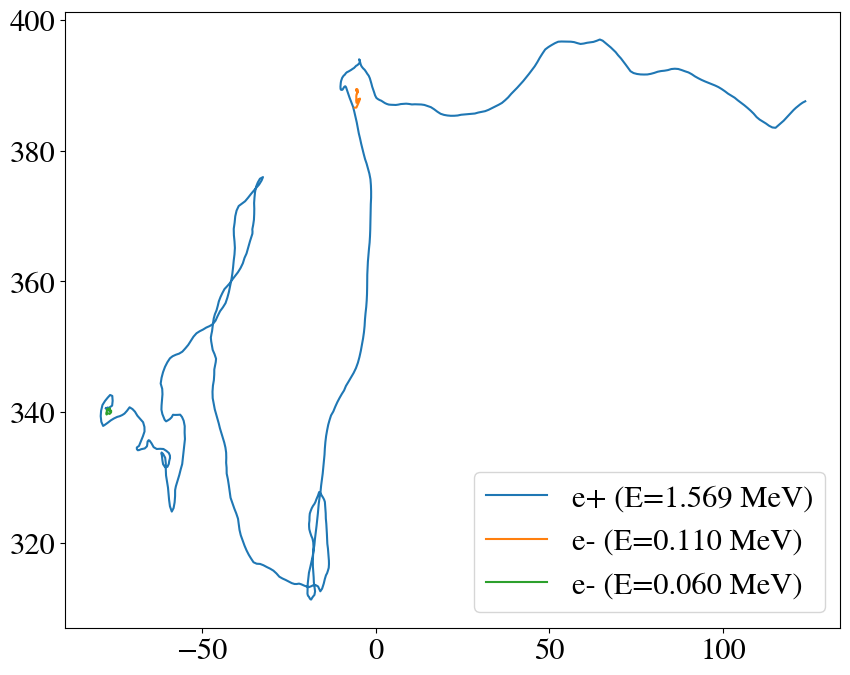

event 225204005: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
514  225204005            1            Tl208     True          0  398.776825   
515  225204005            4               e-    False          1  398.776825   
516  225204005            3        anti_nu_e    False          1  398.776825   
517  225204005            2  Pb208[3708.451]    False          1  398.776825   
518  225204005            6            gamma    False          2  398.776825   
519  225204005           24               e-    False          6  392.468170   
520  225204005           23               e-    False          6  392.468170   
521  225204005           22               e-    False          6  392.468170   
522  225204005           21               e-    False          6  392.468170   
523  225204005           20               e-    False          6  392.468170   
524  225204005           19               e-    False          6  392.468170   
525  225204005           18               e-    False          6  392.468170   
526  225204005           17               e-    False          6  392.468170   
527  225204005           16               e-    False          6  395.698395   
528  225204005           15               e-    False          6  396.125305   
529  225204005           14               e-    False          6  396.125305   
530  225204005           13               e-    False          6  396.125305   
531  225204005           12               e-    False          6  396.125305   
532  225204005           11               e-    False          6  396.125305   
533  225204005           10               e-    False          6  392.010864   
534  225204005            9               e-    False          6  392.010864   
535  225204005            8               e-    False          6  393.155365   
536  225204005            7               e-    False          6  393.155365   
537  225204005            5  Pb208[3197.711]    False          2  398.776825   
538  225204005           26            gamma    False          5  398.776825   
539  225204005           39               e-    False         26  398.960388   
540  225204005           38               e-    False         26  398.960388   
541  225204005           37               e-    False         26  398.960388   
542  225204005           36               e-    False         26  398.960388   
543  225204005           35               e-    False         26  398.960388   
544  225204005           34               e-    False         26  398.960388   
545  225204005           33               e-    False         26  398.960388   
546  225204005           32               e-    False         26  398.960388   
547  225204005           31               e-    False         26  398.960388   
548  225204005           30               e-    False         26  398.960388   
549  225204005           29               e-    False         26  398.960388   
550  225204005           28            gamma    False         26  398.960388   
551  225204005           44               e-    False         28  398.963806   
552  225204005           43               e-    False         28  398.963806   
553  225204005           42               e-    False         28  398.963806   
554  225204005           41               e-    False         28  398.963806   
555  225204005           40               e-    False         28  398.963806   
556  225204005           27               e-    False         26  398.960388   
557  225204005           25  Pb208[2614.522]    False          5  398.776825   
558  225204005           46            gamma    False         25  398.776825   
559  225204005           49            Xe130    False         46  283.912018   
560  225204005        10531               e-    False         48  222.479324   
561  225204005        22085               e-    False         48  200.265823   
562  225204005        31091               e-    False         48  179.641190   
563  2

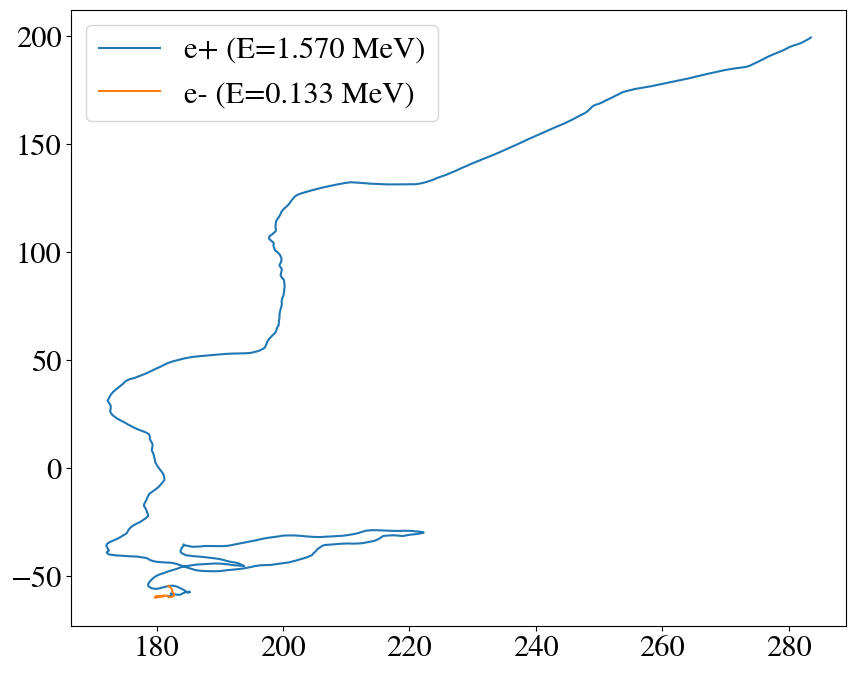

event 14376079: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
7081  14376079            1            Tl208     True          0  398.647156   
7082  14376079            4               e-    False          1  398.647156   
7083  14376079            3        anti_nu_e    False          1  398.647156   
7084  14376079            2  Pb208[3197.711]    False          1  398.647156   
7085  14376079            6            gamma    False          2  398.647156   
7086  14376079           10               e-    False          6  399.287994   
7087  14376079            9               e-    False          6  399.287994   
7088  14376079            8            gamma    False          6  399.287994   
7089  14376079           16               e-    False          8  399.280975   
7090  14376079           15               e-    False          8  399.280975   
7091  14376079           14               e-    False          8  399.280975   
7092  14376079           13               e-    False          8  399.280975   
7093  14376079           12               e-    False          8  399.280975   
7094  14376079           11               e-    False          8  399.280975   
7095  14376079            7               e-    False          6  399.287994   
7096  14376079            5  Pb208[2614.522]    False          2  398.647156   
7097  14376079           18            gamma    False          5  398.647156   
7098  14376079           21            Xe132    False         18  159.973206   
7099  14376079         2276            gamma    False         20  163.076675   
7100  14376079         2338               e-    False       2276  163.120316   
7101  14376079         2337               e-    False       2276  163.120316   
7102  14376079         2336               e-    False       2276  163.120316   
7103  14376079         2335               e-    False       2276  163.120316   
7104  14376079         2334               e-    False       2276  163.120316   
7105  14376079         2333               e-    False       2276  163.120316   
7106  14376079           20               e+    False         18  159.973206   
7107  14376079         6198            gamma    False         20  163.536560   
7108  14376079         6209               e-    False       6198  302.492310   
7109  14376079         6208               e-    False       6198  302.492310   
7110  14376079         6207               e-    False       6198  302.492310   
7111  14376079         6206            gamma    False       6198  302.492310   
7112  14376079         6213               e-    False       6206  302.500183   
7113  14376079         6212               e-    False       6206  302.500183   
7114  14376079         6211               e-    False       6206  302.500183   
7115  14376079         6210               e-    False       6206  302.500183   
7116  14376079         6205               e-    False       6198  302.492310   
7117  14376079         6204               e-    False       6198  310.261810   
7118  14376079         6203               e-    False       6198  310.261810   
7119  14376079         6202               e-    False       6198  311.918182   
7120  14376079         6201               e-    False       6198  314.237946   
7121  14376079         6200               e-    False       6198  314.237946   
7122  14376079         6199               e-    False       6198  314.237946   
7123  14376079         6197            gamma    False         20  163.536560   
7124  14376079         6233               e-    False       6197  -77.315521   
7125  14376079         6232               e-    False       6197  -77.315521   
7126  14376079         6231               e-    False       6197  -77.315521   
7127  14376079         6230               e-    False       6197  -77.315521   
7128  14376079         6229               e-    False       6197  -77.315521   
7129  14376079         6228               e-    False       6197  -77.315521   
7130  

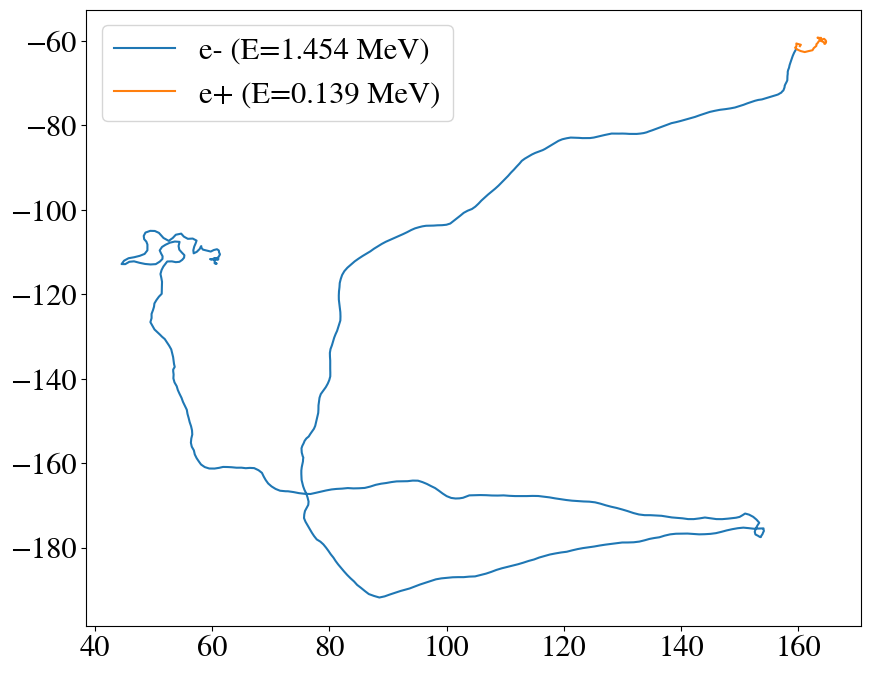

In [ ]:

for evt in funk_hits.event_id.unique():

    df = funk_hits[funk_hits.event_id == evt]
    df_MC = funk_MC[funk_MC.event_id == evt]
    print('='*20)
    print(f'event {evt}: energy {df.energy.sum():.2f} MeV')
    print('='*20)
    display(df_MC)
    energy_threshold = 0.05  # MeV, set your desired threshold

    for p_id, df in df.groupby('particle_id'):
        # associate the p_id back to its original from the MC_df
        particle = df_MC[df_MC.particle_id == p_id]
        if not particle.empty:
            total_energy = particle.iloc[0].kin_energy
            if total_energy > energy_threshold:
                particle_name = particle.iloc[0].particle_name
                label_str = f'{particle_name} (E={total_energy:.3f} MeV)'
                if label_str not in plt.gca().get_legend_handles_labels()[1]:
                    line, = plt.plot(df.x, df.y, label=label_str)
                    color = line.get_color()
                else:
                    handles, labels = plt.gca().get_legend_handles_labels()
                    color = None
                    for h, l in zip(handles, labels):
                        if l == label_str:
                            color = h.get_color()
                            break
                    plt.plot(df.x, df.y, color=color)
        else:
            plt.plot(df.x, df.y, label=f'Particle ID: {p_id}, Name: Unknown')
    plt.legend()
    plt.show()

# take the less energetic lepton from the conversions of each track and plot the kinetic energy

In [25]:
minimum_E_tracks = []
for evt, df in funk_MC.groupby('event_id'):
    # only conversion (e+e-)
    conv_comps = df[df.creator_proc == 'conv']
    
    conv_comps = conv_comps[conv_comps.particle_name.isin(['e+', 'e-'])]
    # keep only the single row with the minimum kinetic energy (preserves a DataFrame)
    conv_comps = conv_comps.loc[[conv_comps['kin_energy'].idxmin()]]
    minimum_E_tracks.append(conv_comps)

minimum_E_tracks = pd.concat(minimum_E_tracks)


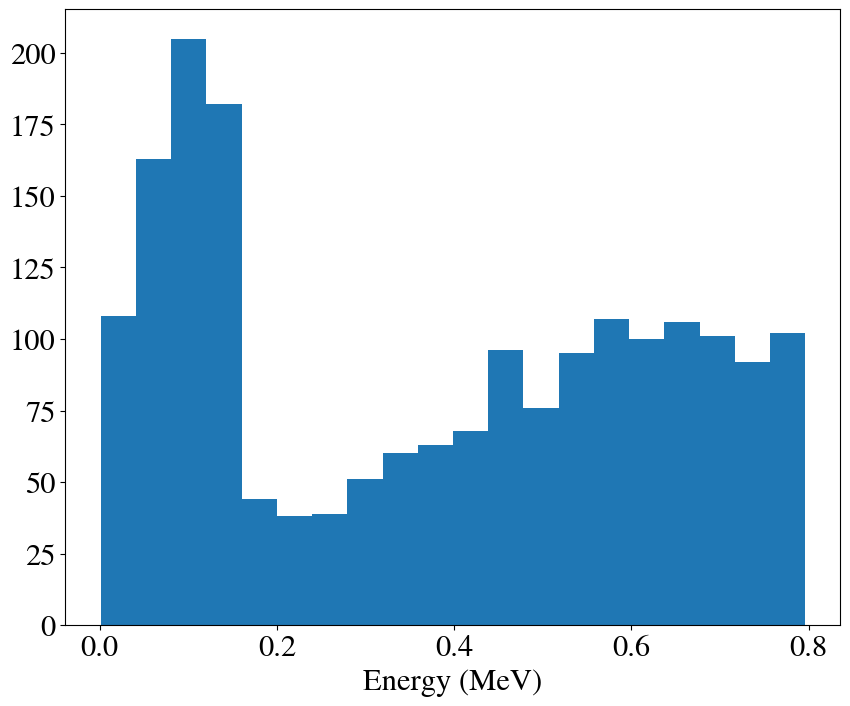

In [30]:
plt.hist(minimum_E_tracks.kin_energy, bins = 20)
#plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.show()

In [34]:
# lets look at these low energy ones
min_E_track_ids = minimum_E_tracks[minimum_E_tracks.kin_energy < 0.2].event_id.unique()
display(min_E_track_ids)

array([    48029,     60043,     72086,    132047,    144055,    204032,
          264018,    276039,    300018,    312094,    420090,    456042,
          468037,    468060,    492069,    504080,    684043,    684087,
          684096,    708072,    780019,    876064,    876074,    888074,
          900011,    924047,    960081,    960088,    972052,    984003,
         1248032,   1260062,   1404016,   1428070,   1440043,   1488057,
         1500034,   1524066,   1548027,   1632091,   1644094,   1752092,
         1848083,   1908025,   1932011,   2040089,   2052101,   2088005,
         2136006,   2292035,   2292066,   2424014,   2532093,   2556104,
         2580068,   2724065,   2832034,   2856090,   2916055,   2928082,
         2952003,   2964028,   3000048,   3036024,   3060052,   3348087,
         3372044,   3372058,   3408086,   3420045,   3456001,   3516017,
         3516063,   3528019,   3588035,   3756000,   3768017,   3768031,
         3912048,   3948045,   3996008,   4044002, 

event 48029: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
2718     48029            1            Tl208     True          0  398.393188   
2719     48029            4               e-    False          1  398.393188   
2720     48029            3        anti_nu_e    False          1  398.393188   
2721     48029            2  Pb208[3197.711]    False          1  398.393188   
2722     48029            6            gamma    False          2  398.393188   
2723     48029           22               e-    False          6  393.676514   
2724     48029           21               e-    False          6  393.676514   
2725     48029           20               e-    False          6  393.676514   
2726     48029           19               e-    False          6  393.676514   
2727     48029           18               e-    False          6  393.676514   
2728     48029           17               e-    False          6  393.676514   
2729     48029           16               e-    False          6  393.676514   
2730     48029           15               e-    False          6  393.475403   
2731     48029           14               e-    False          6  393.475403   
2732     48029           13               e-    False          6  398.894135   
2733     48029           12               e-    False          6  397.473389   
2734     48029           11               e-    False          6  397.473389   
2735     48029           10               e-    False          6  407.264069   
2736     48029            9               e-    False          6  408.551086   
2737     48029            8               e-    False          6  405.776733   
2738     48029            7               e-    False          6  405.776733   
2739     48029            5  Pb208[2614.522]    False          2  398.393188   
2740     48029           24            gamma    False          5  398.393188   
2741     48029           27            Xe132    False         24  121.946899   
2742     48029         5284               e-    False         26  107.774445   
2743     48029        23488               e-    False         26   28.077528   
2744     48029        33868               e-    False         26    7.441359   
2745     48029        49297               e-    False         26    9.224892   
2746     48029        57755               e-    False         26   11.101746   
2747     48029           26               e+    False         24  121.946899   
2748     48029        64116            gamma    False         26   10.046828   
2749     48029        64129               e-    False      64116 -154.712250   
2750     48029        64128               e-    False      64116 -154.712250   
2751     48029        64127               e-    False      64116 -154.712250   
2752     48029        64126               e-    False      64116 -154.712250   
2753     48029        64125               e-    False      64116 -154.712250   
2754     48029        64124               e-    False      64116 -154.712250   
2755     48029        64123               e-    False      64116 -154.712250   
2756     48029        64122               e-    False      64116 -154.712250   
2757     48029        64121               e-    False      64116 -175.843597   
2758     48029        64120               e-    False      64116 -180.539291   
2759     48029        64119               e-    False      64116 -180.539291   
2760     48029        64118               e-    False      64116 -175.018127   
2761     48029        64117               e-    False      64116 -175.018127   
2762     48029        64115            gamma    False         26   10.046828   
2763     48029        64150               e-    False      64115  460.720978   
2764     48029        64149               e-    False      64115  460.720978   
2765     48029        64148               e-    False      64115  460.720978   
2766     48029        64147               e-    False      64115  460.720978   
2767  

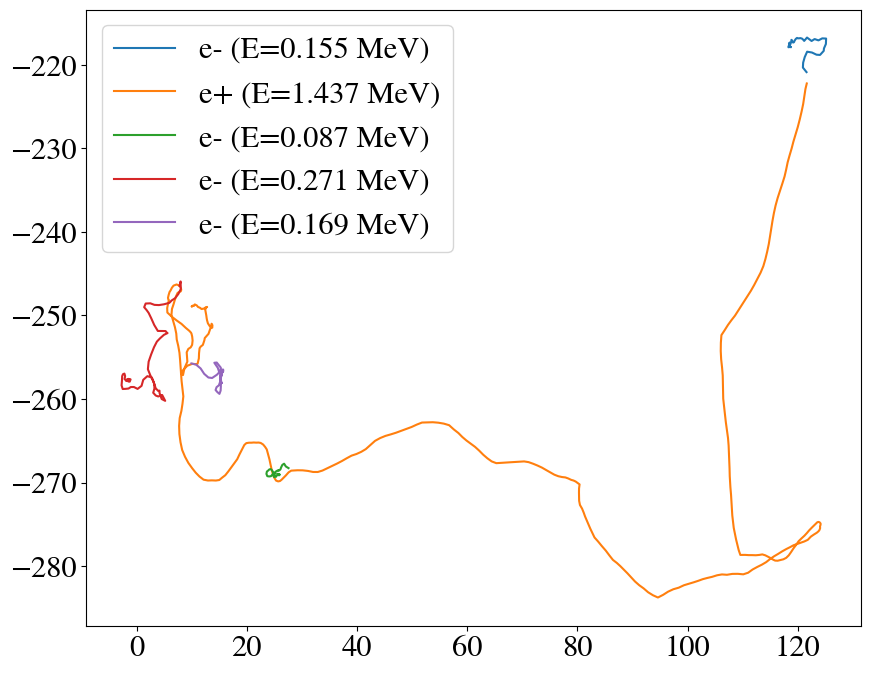

event 60043: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
4057     60043            1            Tl208     True          0  398.522888   
4058     60043            4               e-    False          1  398.522888   
4059     60043            3        anti_nu_e    False          1  398.522888   
4060     60043            2  Pb208[3475.078]    False          1  398.522888   
4061     60043            6            gamma    False          2  398.522888   
4062     60043           20               e-    False          6  310.342834   
4063     60043           19               e-    False          6  310.342834   
4064     60043           18               e-    False          6  310.342834   
4065     60043           17            gamma    False          6  310.342834   
4066     60043           22               e-    False         17  310.342926   
4067     60043           21               e-    False         17  310.342926   
4068     60043           16               e-    False          6  310.342834   
4069     60043           15               e-    False          6  310.342834   
4070     60043           14               e-    False          6  310.661285   
4071     60043           13               e-    False          6  310.209259   
4072     60043           12               e-    False          6  310.498413   
4073     60043           11               e-    False          6  310.498413   
4074     60043           10               e-    False          6  313.052673   
4075     60043            9               e-    False          6  314.019897   
4076     60043            8               e-    False          6  314.019897   
4077     60043            7               e-    False          6  314.019897   
4078     60043            5  Pb208[3197.711]    False          2  398.522888   
4079     60043           24            gamma    False          5  398.522888   
4080     60043           34               e-    False         24  402.641815   
4081     60043           33               e-    False         24  402.641815   
4082     60043           32               e-    False         24  402.641815   
4083     60043           31               e-    False         24  402.641815   
4084     60043           30               e-    False         24  402.641815   
4085     60043           29               e-    False         24  402.641815   
4086     60043           28               e-    False         24  402.608185   
4087     60043           27               e-    False         24  402.439575   
4088     60043           26               e-    False         24  400.669220   
4089     60043           25               e-    False         24  399.805786   
4090     60043           23  Pb208[2614.522]    False          5  398.522888   
4091     60043           36            gamma    False         23  398.522888   
4092     60043           39            Xe132    False         36 -251.266312   
4093     60043           38               e+    False         36 -251.266312   
4094     60043         6779            gamma    False         38 -256.871765   
4095     60043         6789               e-    False       6779  -58.800419   
4096     60043         6788               e-    False       6779  -58.800419   
4097     60043         6787            gamma    False       6779  -58.800419   
4098     60043         6791               e-    False       6787  -58.793331   
4099     60043         6790               e-    False       6787  -58.793331   
4100     60043         6786               e-    False       6779  -58.800419   
4101     60043         6785               e-    False       6779  464.109619   
4102     60043         6784               e-    False       6779  464.109619   
4103     60043         6783               e-    False       6779  464.211853   
4104     60043         6782               e-    False       6779  464.211853   
4105     60043         6781               e-    False       6779  464.310577   
4106  

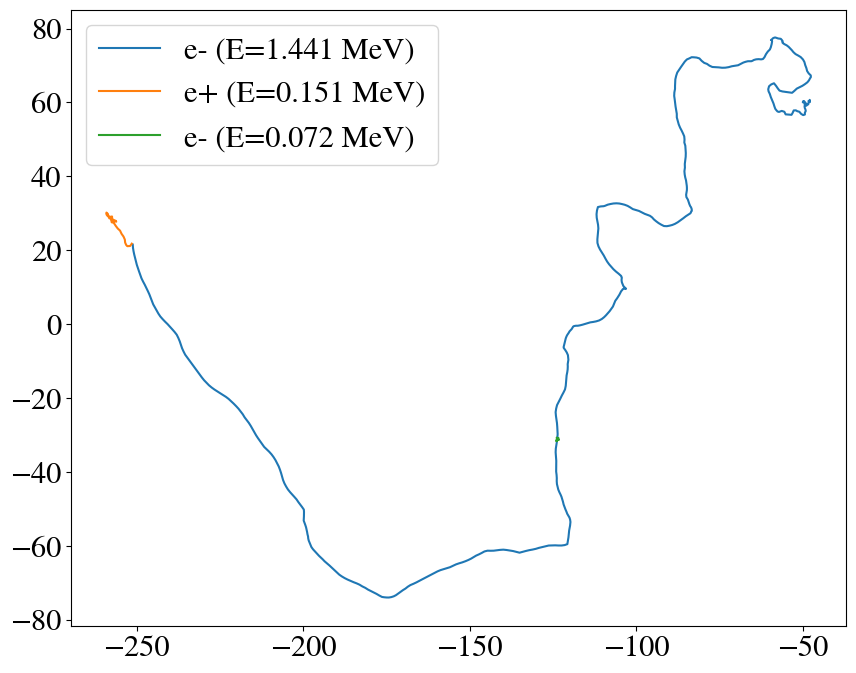

event 72086: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
7580     72086            1            Tl208     True          0  399.079865   
7581     72086            4               e-    False          1  399.079865   
7582     72086            3        anti_nu_e    False          1  399.079865   
7583     72086            2  Pb208[3961.162]    False          1  399.079865   
7584     72086            6            gamma    False          2  399.079865   
7585     72086           17               e-    False          6  395.917938   
7586     72086           16               e-    False          6  395.917938   
7587     72086           15               e-    False          6  395.917938   
7588     72086           14            gamma    False          6  395.917938   
7589     72086           22               e-    False         14  395.907654   
7590     72086           21               e-    False         14  395.907654   
7591     72086           20               e-    False         14  395.907654   
7592     72086           19               e-    False         14  395.907654   
7593     72086           18               e-    False         14  395.907654   
7594     72086           13               e-    False          6  395.917938   
7595     72086           12               e-    False          6  396.559265   
7596     72086           11               e-    False          6  394.069366   
7597     72086           10               e-    False          6  393.510681   
7598     72086            9               e-    False          6  393.510681   
7599     72086            8               e-    False          6  393.510681   
7600     72086            7               e-    False          6  393.510681   
7601     72086            5  Pb208[3197.711]    False          2  399.079865   
7602     72086           24            gamma    False          5  399.079865   
7603     72086           34               e-    False         24  439.342163   
7604     72086           33               e-    False         24  439.342163   
7605     72086           32            gamma    False         24  439.342163   
7606     72086           38               e-    False         32  439.348572   
7607     72086           37               e-    False         32  439.348572   
7608     72086           36               e-    False         32  439.348572   
7609     72086           35               e-    False         32  439.348572   
7610     72086           31               e-    False         24  439.342163   
7611     72086           30               e-    False         24  354.348206   
7612     72086           29               e-    False         24  354.344055   
7613     72086           28               e-    False         24  355.614197   
7614     72086           27               e-    False         24  355.614197   
7615     72086           26               e-    False         24  355.614197   
7616     72086           25               e-    False         24  355.614197   
7617     72086           23  Pb208[2614.522]    False          5  399.079865   
7618     72086           40            gamma    False         23  399.079865   
7619     72086           43            Xe129    False         40   36.070881   
7620     72086           42               e+    False         40   36.070881   
7621     72086         2414            gamma    False         42   36.683853   
7622     72086         2427               e-    False       2414  459.891479   
7623     72086         2426               e-    False       2414  459.891479   
7624     72086         2425               e-    False       2414  459.891479   
7625     72086         2424               e-    False       2414  459.891479   
7626     72086         2423               e-    False       2414  459.891479   
7627     72086         2422               e-    False       2414  459.891479   
7628     72086         2421               e-    False       2414  459.891479   
7629  

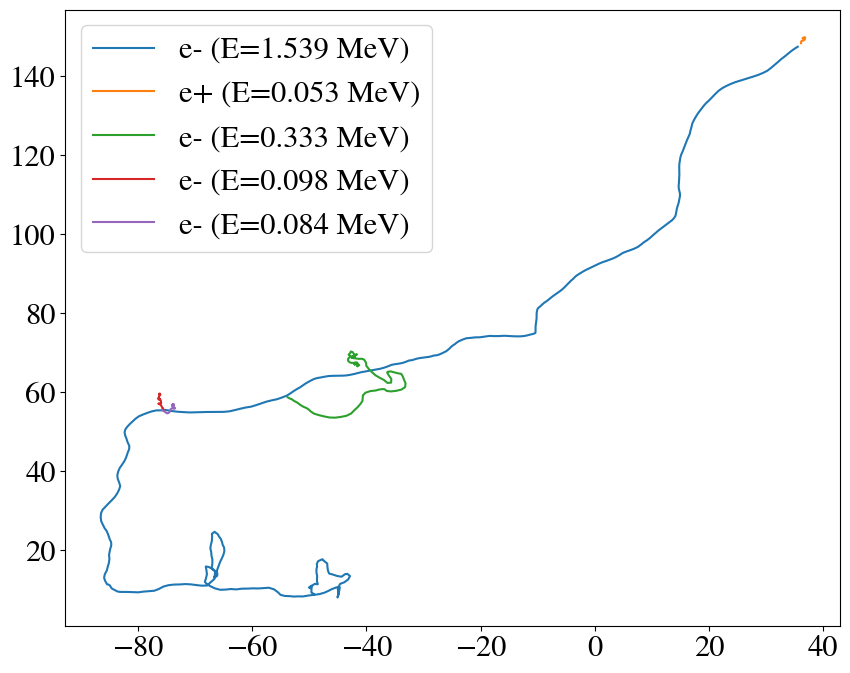

event 132047: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
4267    132047            1            Tl208     True          0  398.698334   
4268    132047            4               e-    False          1  398.698334   
4269    132047            3        anti_nu_e    False          1  398.698334   
4270    132047            2  Pb208[3475.078]    False          1  398.698334   
4271    132047            6            gamma    False          2  398.698334   
4272    132047           21               e-    False          6 -560.607605   
4273    132047           20               e-    False          6 -560.607605   
4274    132047           19               e-    False          6 -560.607605   
4275    132047           18               e-    False          6 -560.607605   
4276    132047           17               e-    False          6 -560.607605   
4277    132047           16               e-    False          6 -564.472717   
4278    132047           15               e-    False          6 -564.472717   
4279    132047           14               e-    False          6 -564.472717   
4280    132047           13               e-    False          6 -564.472717   
4281    132047           12               e-    False          6 -564.472717   
4282    132047           11               e-    False          6 -564.472717   
4283    132047           10               e-    False          6 -564.472717   
4284    132047            9               e-    False          6 -556.200073   
4285    132047            8               e-    False          6 -556.200073   
4286    132047            7               e-    False          6 -558.650940   
4287    132047            5  Pb208[2614.522]    False          2  398.698334   
4288    132047           23            gamma    False          5  398.698334   
4289    132047           26            Xe132    False         23  330.901428   
4290    132047           25               e+    False         23  330.901428   
4291    132047          370            gamma    False         25  330.934784   
4292    132047          385               e-    False        370  312.994934   
4293    132047          384               e-    False        370  312.994934   
4294    132047          383               e-    False        370  312.994934   
4295    132047          382               e-    False        370  312.994934   
4296    132047          381               e-    False        370  312.994934   
4297    132047          380               e-    False        370  312.994934   
4298    132047          379               e-    False        370  312.994934   
4299    132047          378               e-    False        370  312.994934   
4300    132047          377               e-    False        370  312.994934   
4301    132047          376               e-    False        370  312.994934   
4302    132047          375               e-    False        370  310.235199   
4303    132047          374               e-    False        370  310.235199   
4304    132047          373               e-    False        370  309.908417   
4305    132047          372               e-    False        370  309.297272   
4306    132047          371               e-    False        370  309.297272   
4307    132047          369            gamma    False         25  330.934784   
4308    132047          402               e-    False        369  387.103851   
4309    132047          401               e-    False        369  387.103851   
4310    132047          400            gamma    False        369  387.103851   
4311    132047          404               e-    False        400  387.099396   
4312    132047          403               e-    False        400  387.099396   
4313    132047          399               e-    False        369  387.103851   
4314    132047          398               e-    False        369  386.980682   
4315    132047          397               e-    False        369  386.980682   
4316  

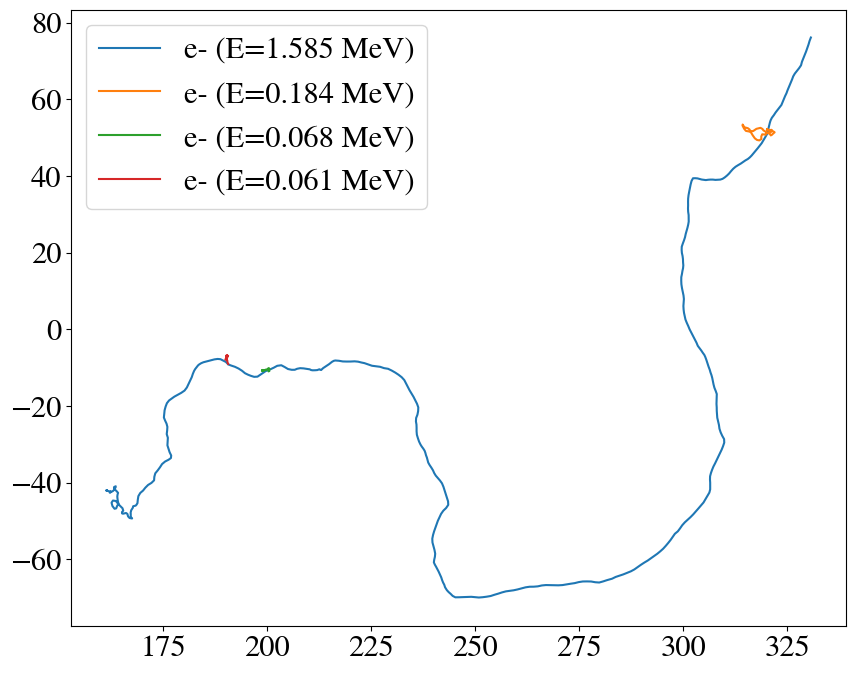

event 144055: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
5438    144055            1            Tl208     True          0  398.559479   
5439    144055            4               e-    False          1  398.559479   
5440    144055            5            gamma    False          4  398.455597   
5441    144055            9               e-    False          5  398.713593   
5442    144055            8               e-    False          5  398.713593   
5443    144055            7               e-    False          5  398.713593   
5444    144055            6               e-    False          5  398.713593   
5445    144055            3        anti_nu_e    False          1  398.559479   
5446    144055            2  Pb208[3197.711]    False          1  398.559479   
5447    144055           11            gamma    False          2  398.559479   
5448    144055           23               e-    False         11  399.268402   
5449    144055           22               e-    False         11  399.268402   
5450    144055           21               e-    False         11  399.268402   
5451    144055           20            gamma    False         11  399.268402   
5452    144055           25            gamma    False         20  399.267273   
5453    144055           27               e-    False         25  399.267212   
5454    144055           26               e-    False         25  399.267212   
5455    144055           24               e-    False         20  399.267273   
5456    144055           19               e-    False         11  399.268402   
5457    144055           18            gamma    False         11  400.024628   
5458    144055           29               e-    False         18  400.024323   
5459    144055           28               e-    False         18  400.024323   
5460    144055           17               e-    False         11  400.024628   
5461    144055           16               e-    False         11  404.396271   
5462    144055           15               e-    False         11  403.493652   
5463    144055           14               e-    False         11  403.493652   
5464    144055           13               e-    False         11  400.781708   
5465    144055           12               e-    False         11  400.781708   
5466    144055           10  Pb208[2614.522]    False          2  398.559479   
5467    144055           31            gamma    False         10  398.559479   
5468    144055           34            Xe131    False         31  335.942566   
5469    144055        10566               e-    False         33  248.237488   
5470    144055        13268               e-    False         33  232.233826   
5471    144055        16564               e-    False         33  201.109329   
5472    144055        23347               e-    False         33  150.673523   
5473    144055        26205               e-    False         33  153.575455   
5474    144055        33617               e-    False         33  134.442963   
5475    144055        41316            gamma    False         33  154.772888   
5476    144055        41332               e-    False      41316  156.853973   
5477    144055        41331               e-    False      41316  156.853973   
5478    144055        41330               e-    False      41316  156.853973   
5479    144055        41329               e-    False      41316  156.853973   
5480    144055        41328               e-    False      41316  156.853973   
5481    144055        41327               e-    False      41316  156.853973   
5482    144055        41326               e-    False      41316  156.853973   
5483    144055        41325               e-    False      41316  156.853973   
5484    144055        41324               e-    False      41316  156.853973   
5485    144055        41323               e-    False      41316  156.853973   
5486    144055        41322               e-    False      41316  156.853973   
5487  

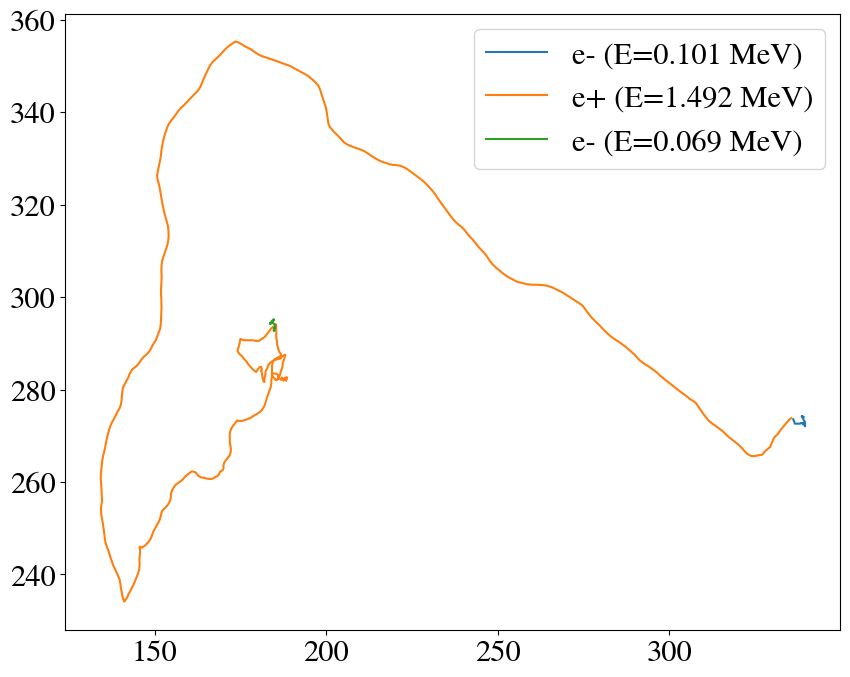

event 204032: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
2816    204032            1            Tl208     True          0  399.063904   
2817    204032            4               e-    False          1  399.063904   
2818    204032            3        anti_nu_e    False          1  399.063904   
2819    204032            2  Pb208[3475.078]    False          1  399.063904   
2820    204032            6            gamma    False          2  399.063904   
2821    204032           22               e-    False          6  384.740540   
2822    204032           21               e-    False          6  384.740540   
2823    204032           20               e-    False          6  384.740540   
2824    204032           19               e-    False          6  384.740540   
2825    204032           18            gamma    False          6  384.740540   
2826    204032           24               e-    False         18  384.756897   
2827    204032           23               e-    False         18  384.756897   
2828    204032           17               e-    False          6  384.740540   
2829    204032           16               e-    False          6  383.249786   
2830    204032           15               e-    False          6  383.390564   
2831    204032           14               e-    False          6  386.993927   
2832    204032           13               e-    False          6  388.164276   
2833    204032           12               e-    False          6  388.164276   
2834    204032           11               e-    False          6  378.382507   
2835    204032           10               e-    False          6  378.382507   
2836    204032            9               e-    False          6  381.852478   
2837    204032            8               e-    False          6  389.518005   
2838    204032            7               e-    False          6  389.518005   
2839    204032            5  Pb208[2614.522]    False          2  399.063904   
2840    204032           26            gamma    False          5  399.063904   
2841    204032           29            Xe129    False         26  122.512650   
2842    204032         1083               e-    False         28  123.724243   
2843    204032         4720               e-    False         28  122.851601   
2844    204032           28               e+    False         26  122.512650   
2845    204032         5560            gamma    False         28  122.839882   
2846    204032         5571               e-    False       5560  478.066223   
2847    204032         5570            gamma    False       5560  478.066223   
2848    204032         5576               e-    False       5570  478.055786   
2849    204032         5575               e-    False       5570  478.055786   
2850    204032         5574               e-    False       5570  478.055786   
2851    204032         5573               e-    False       5570  478.055786   
2852    204032         5572               e-    False       5570  478.055786   
2853    204032         5569               e-    False       5560  478.066223   
2854    204032         5568               e-    False       5560  477.531738   
2855    204032         5567               e-    False       5560  477.531738   
2856    204032         5566               e-    False       5560  477.531738   
2857    204032         5565               e-    False       5560  496.098724   
2858    204032         5564               e-    False       5560  492.912323   
2859    204032         5563               e-    False       5560  512.777222   
2860    204032         5562               e-    False       5560  512.777222   
2861    204032         5561               e-    False       5560  486.081635   
2862    204032         5559            gamma    False         28  122.839882   
2863    204032         5585               e-    False       5559 -346.738464   
2864    204032         5584               e-    False       5559 -346.738464   
2865  

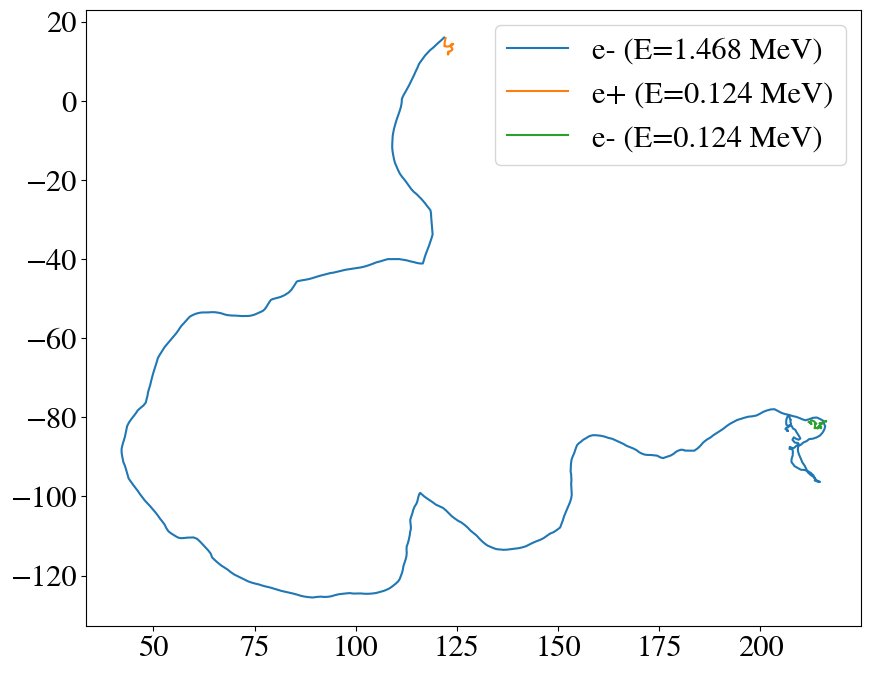

event 264018: energy 1.59 MeV


event_id  particle_id    particle_name  primary  mother_id   initial_x  \
1629    264018            1            Tl208     True          0  398.828400   
1630    264018            4               e-    False          1  398.828400   
1631    264018            3        anti_nu_e    False          1  398.828400   
1632    264018            2  Pb208[3197.711]    False          1  398.828400   
1633    264018            6            gamma    False          2  398.828400   
1634    264018           12               e-    False          6  398.839966   
1635    264018           11               e-    False          6  398.839966   
1636    264018           10               e-    False          6  398.839966   
1637    264018            9               e-    False          6  398.839966   
1638    264018            8            gamma    False          6  398.839966   
1639    264018           15               e-    False          8  400.628235   
1640    264018           14            gamma    False          8  400.628235   
1641    264018           22               e-    False         14  400.622009   
1642    264018           21               e-    False         14  400.622009   
1643    264018           20               e-    False         14  400.622009   
1644    264018           19               e-    False         14  400.622009   
1645    264018           18               e-    False         14  400.622009   
1646    264018           17               e-    False         14  400.622009   
1647    264018           16               e-    False         14  400.622009   
1648    264018           13               e-    False          8  400.628235   
1649    264018            7               e-    False          6  398.839966   
1650    264018            5  Pb208[2614.522]    False          2  398.828400   
1651    264018           24            gamma    False          5  398.828400   
1652    264018           27            Xe132    False         24  313.470123   
1653    264018           26               e+    False         24  313.470123   
1654    264018         2728            gamma    False         26  313.147247   
1655    264018         2737               e-    False       2728  468.213593   
1656    264018         2736               e-    False       2728  468.213593   
1657    264018         2735            gamma    False       2728  468.213593   
1658    264018         2739               e-    False       2735  468.211334   
1659    264018         2738               e-    False       2735  468.211334   
1660    264018         2734               e-    False       2728  468.213593   
1661    264018         2733               e-    False       2728  526.963684   
1662    264018         2732               e-    False       2728  526.963684   
1663    264018         2731               e-    False       2728  526.963684   
1664    264018         2740            gamma    False       2731  526.977234   
1665    264018         2743               e-    False       2740  526.982788   
1666    264018         2742            gamma    False       2740  526.982788   
1667    264018         2748               e-    False       2742  526.972656   
1668    264018         2747               e-    False       2742  526.972656   
1669    264018         2746               e-    False       2742  526.972656   
1670    264018         2745               e-    False       2742  526.972656   
1671    264018         2744               e-    False       2742  526.972656   
1672    264018         2741               e-    False       2740  526.982788   
1673    264018         2730               e-    False       2728  506.963257   
1674    264018         2729               e-    False       2728  506.963257   
1675    264018         2727            gamma    False         26  313.147247   
1676    264018         2758               e-    False       2727  -88.258919   
1677    264018         2757               e-    False       2727  -88.258919   
1678  

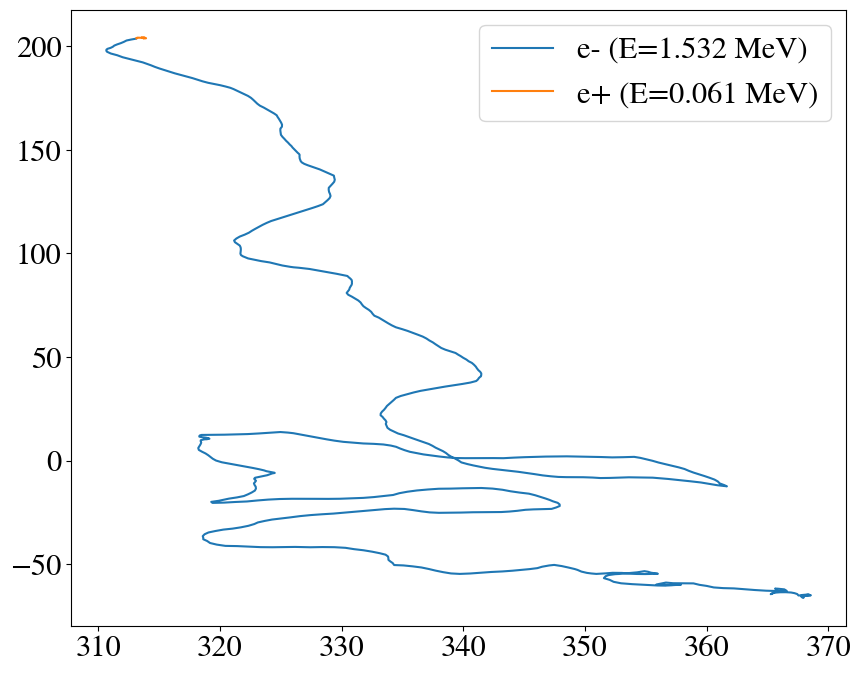

In [35]:
stopper = 5
for i, evt in enumerate(min_E_track_ids):

    df = funk_hits[funk_hits.event_id == evt]
    df_MC = funk_MC[funk_MC.event_id == evt]
    print('='*20)
    print(f'event {evt}: energy {df.energy.sum():.2f} MeV')
    print('='*20)
    display(df_MC)
    energy_threshold = 0.05  # MeV, set your desired threshold

    for p_id, df in df.groupby('particle_id'):
        # associate the p_id back to its original from the MC_df
        particle = df_MC[df_MC.particle_id == p_id]
        if not particle.empty:
            total_energy = particle.iloc[0].kin_energy
            if total_energy > energy_threshold:
                particle_name = particle.iloc[0].particle_name
                label_str = f'{particle_name} (E={total_energy:.3f} MeV)'
                if label_str not in plt.gca().get_legend_handles_labels()[1]:
                    line, = plt.plot(df.x, df.y, label=label_str)
                    color = line.get_color()
                else:
                    handles, labels = plt.gca().get_legend_handles_labels()
                    color = None
                    for h, l in zip(handles, labels):
                        if l == label_str:
                            color = h.get_color()
                            break
                    plt.plot(df.x, df.y, color=color)
        else:
            plt.plot(df.x, df.y, label=f'Particle ID: {p_id}, Name: Unknown')
    plt.legend()
    plt.show()

    if i > stopper:
        break

## load in small subset of the data and check distribution

In [36]:
MC_df = []

# couple of LDCs to speed it up
for LDC in tqdm(range(1,2)):
# load in single file
    print(f'LDC{LDC}')
    full_path = f'{mc_path}ldc{LDC}/'

    file_names = [f for f in os.listdir(full_path) if os.path.isfile(os.path.join(full_path, f)) and f.endswith('.h5')]
    print(file_names)

    for file in tqdm(file_names):
        specific_path = f'{full_path}/{file}'

        try:
            MC_df.append(load_single_file(specific_path))
        except:
            print('broke')


  0%|                                                                                               | 0/1 [00:00<?, ?it/s]

LDC1
['NEXT100_Tl208_Port1a_sophronia_18892_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18159_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1066_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1549_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1487_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18436_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1663_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1253_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_154_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18999_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1567_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1312_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18221_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_18640_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1396_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_3525_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_65_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1304_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1737_thekla.h5', 'NEXT100_Tl208_Port1a_sophronia_1106_thekla.h5', 'NEXT100_Tl

100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [07:33<00:00, 453.04s/it]


In [37]:
MC_df = pd.concat(MC_df)
display(MC_df)

event_id  particle_id    particle_name  primary  mother_id  \
0      226716000            1            Tl208     True          0   
1      226716000            4               e-    False          1   
2      226716000            3        anti_nu_e    False          1   
3      226716000            2  Pb208[3197.711]    False          1   
4      226716000            6            gamma    False          2   
...          ...          ...              ...      ...        ...   
10564    6252117        35422               e-    False         27   
10565    6252117        37201               e-    False         27   
10566    6252117        41438               e-    False         27   
10567    6252117           27               e-    False         26   
10568    6252117           25            Pb208    False          5   

        initial_x   initial_y   initial_z  initial_t       final_x  ...  \
0      399.106079  401.554993  564.307190   0.000000    399.106079  ...   
1      399.106079  401.554993  564.307190   0.000587    399.133789  ...   
2      399.106079  401.554993  564.307190   0.000587 -12500.000000  ...   
3      399.106079  401.554993  564.307190   0.000587    399.106079  ...   
4      399.106079  401.554993  564.307190   0.000587    440.988129  ...   
...           ...         ...         ...        ...           ...  ...   
10564  411.152222  245.003693  566.500427   1.398492    411.112671  ...   
10565  415.909943  243.051758  571.801880   1.446245    415.549591  ...   
10566  411.289948  243.065277  571.491638   1.524130    410.964142  ...   
10567  344.428894  353.253387  528.108765   0.271349    412.959290  ...   
10568  398.967743  401.752716  563.958923   0.000116    398.967743  ...   

       initial_momentum_x  initial_momentum_y  initial_momentum_z  \
0                0.000000            0.000000            0.000000   
1                0.679778            0.310396            0.058041   
2               -1.276566           -0.510600           -0.289346   
3                0.596783            0.200203            0.231303   
4                0.257578            0.206693            0.480666   
...                   ...                 ...                 ...   
10564           -0.025734           -0.095914            0.054705   
10565            0.035187           -0.136450            0.125442   
10566            0.094917            0.010756           -0.139441   
10567           -0.509500           -1.451232           -0.414326   
10568            1.753607            1.559416            1.152702   

      final_momentum_x final_momentum_y  final_momentum_z  kin_energy  \
0             0.000000           0.0000          0.000000    0.000000   
1            -0.000000          -0.0000         -0.000000    0.396157   
2            -1.276566          -0.5106         -0.289346    1.405010   
3             0.000000           0.0000          0.000000    0.000001   
4             0.000000           0.0000          0.000000    0.583188   
...                ...              ...               ...         ...   
10564        -0.000000          -0.0000          0.000000    0.012427   
10565         0.000000          -0.0000          0.000000    0.033714   
10566         0.000000          -0.0000         -0.000000    0.027228   
10567         0.000000          -0.0000         -0.000000    1.161858   
10568         0.000000           0.0000          0.000000    0.000018   

             length      creator_proc        final_proc  
0          0.000000              none  RadioactiveDecay  
1          0.225791  RadioactiveDecay         NoProcess  
2      14196.975586  RadioactiveDecay    Transportation  
3          0.000000  RadioactiveDecay  RadioactiveDecay  
4         93.122765  RadioactiveDecay              phot  
...             ...               ...               ...  
10564      0.455920             eIoni         NoProcess  
10565      1.414527             eIoni         NoProcess  
10566      1.677509             eIoni 

In [41]:
minimum_E_tracks_df = []
for evt, df in MC_df.groupby('event_id'):
    # only conversion (e+e-)
    conv_comps = df[df.creator_proc == 'conv']
    
    conv_comps = conv_comps[conv_comps.particle_name.isin(['e+', 'e-'])]
    # keep only the single row with the minimum kinetic energy (preserves a DataFrame)
    try:
        conv_comps = conv_comps.loc[[conv_comps['kin_energy'].idxmin()]]
        minimum_E_tracks_df.append(conv_comps)
    except:
        print('broke')
    

minimum_E_tracks_df = pd.concat(minimum_E_tracks_df)

broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
brok

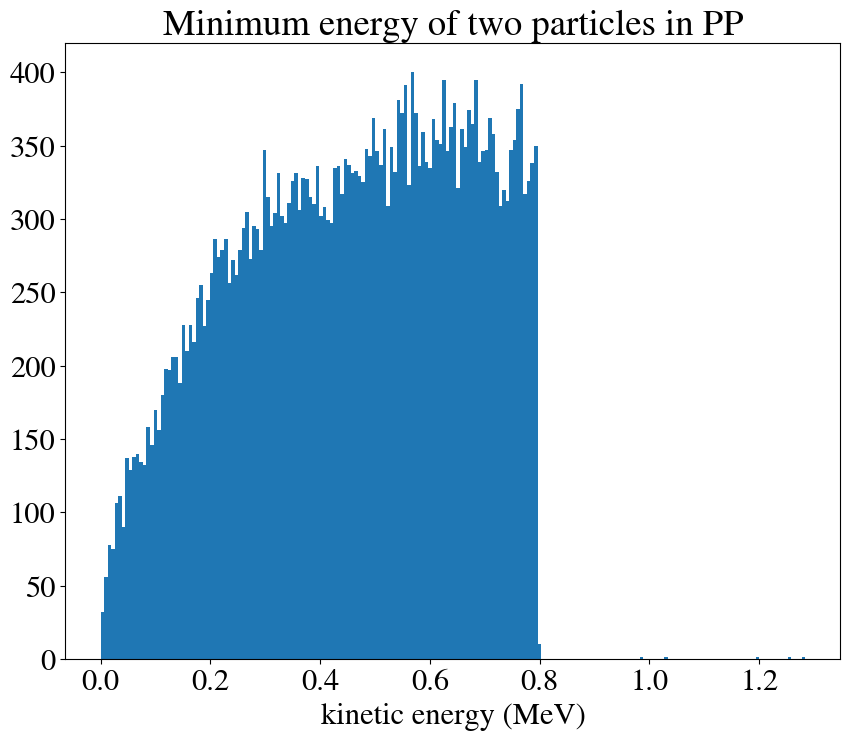

In [45]:
plt.hist(minimum_E_tracks_df.kin_energy, bins = 200)
plt.title('Minimum energy of two particles in PP')
plt.xlabel('kinetic energy (MeV)')
plt.show()

### first take slice of minimum_E_tracks that pass the topological cuts and check

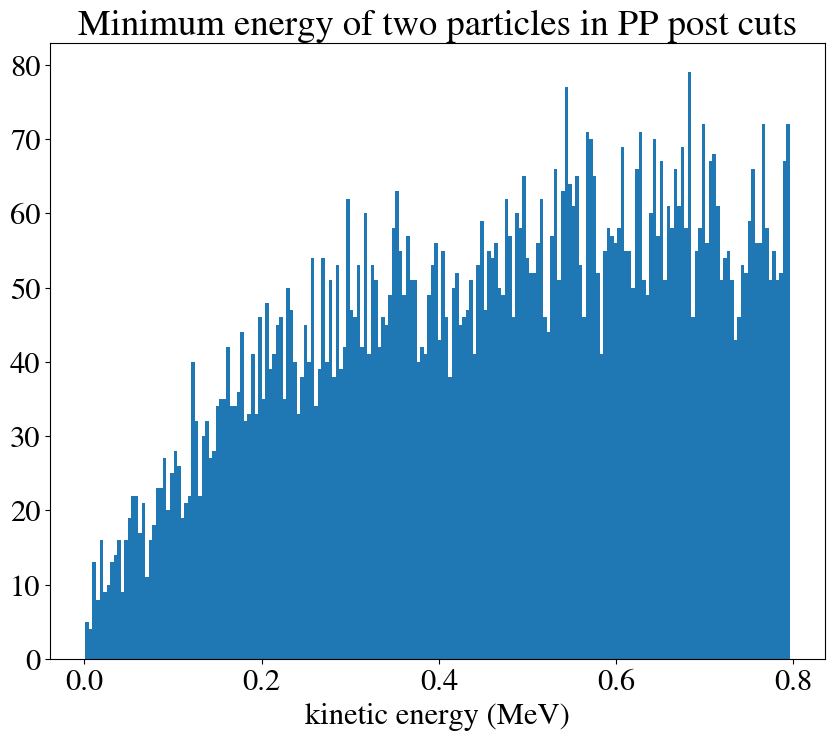

In [51]:
cut_hdst_minima = minimum_E_tracks_df[minimum_E_tracks_df.event_id.isin(np.load('MC_truth_FOM/cut_hdst.npy'))]


plt.hist(cut_hdst_minima.kin_energy, bins = 200)
plt.title('Minimum energy of two particles in PP post cuts')
plt.xlabel('kinetic energy (MeV)')
plt.show()

### plot slices of kin_energy across blob1 and blob2 values

In [58]:
signal_df = pd.read_hdf('MC_truth_FOM/signal_df.h5', 'signal_dst')
bckgnd_df = pd.read_hdf('MC_truth_FOM/bckgnd_df.h5', 'signal_dst')
display(signal_df)

event  trackID    energy      length  numb_of_voxels  \
88      222660040        0  1.592507  229.056967             107   
152     222660064        0  1.592507  121.649061              94   
269       5172023        0  1.592507  413.388515             112   
331       5172055        0  1.592507  361.082235             102   
359       5172070        0  1.592507  357.226056             119   
...           ...      ...       ...         ...             ...   
455035  136512016        0  1.592507  224.697840             102   
455041  136512021        0  1.592507  387.379768             125   
455056  136512026        0  1.592507  401.256235             114   
455147  136512064        0  1.592507  453.319078             126   
455198  136512082        0  1.592507  350.158969              97   

        numb_of_hits  numb_of_tracks       x_min       y_min        z_min  \
88              1171               1 -119.323738   -4.530233   368.697205   
152              942               1  205.270370  234.213867   569.661987   
269             1108               1  -67.418594  -48.543835   434.579773   
331             1236               1   27.841034  -38.074989   781.979736   
359             1068               1  -56.117756 -390.471130   249.588745   
...              ...             ...         ...         ...          ...   
455035          1013               1   85.884842  224.205276   740.487793   
455041          1019               1  209.753235   39.457260  1034.376953   
455056          1131               1 -262.299408 -160.754959   638.465027   
455147           927               1   70.694809  112.518463   364.023407   
455198          1047               1  138.919815  125.773865   217.696732   

        ...      blob1_z     blob2_x     blob2_y      blob2_z    eblob1  \
88      ...   432.508592  -70.513918   16.474617   377.312525  0.465015   
152     ...   594.265483  211.093430  325.596619   598.143921  0.297037   
269     ...   560.807484  -30.858767   39.415035   434.809692  0.274531   
331     ...   835.935913   43.301181  -36.615407   848.005427  0.406009   
359     ...   339.101341   77.135268 -347.861515   263.670263  0.483622   
...     ...          ...         ...         ...          ...       ...   
455035  ...   822.377021  171.581360  224.827847   754.413725  0.316032   
455041  ...  1044.740243  259.560174   93.661485  1038.531241  0.284243   
455056  ...   756.229935 -183.736919   -9.330667   644.460158  0.425649   
455147  ...   397.471268  273.926229  227.545683   467.835681  0.386372   
455198  ...   258.088448  146.116307  265.363457   228.328821  0.458897   

          eblob2  ovlp_blob_energy  vox_size_x  vox_size_y  vox_size_z  
88      0.362237               0.0    5.753916    5.876227    5.857025  
152     0.277403               0.0    5.895096    5.750225    5.849870  
269     0.263181               0.0    5.996291    5.832827    5.784504  
331     0.302715               0.0    5.992148    5.786353    5.712349  
359     0.419253               0.0    5.863712    5.584536    5.819414  
...          ...               ...         ...         ...         ...  
455035  0.185106               0.0    5.933787    5.795077    5.859760  
455041  0.258376               0.0    5.884396    5.658646    5.842472  
455056  0.327376               0.0    5.641576    5.842497    5.828477  
455147  0.320060               0.0    5.984538    5.922454    5.927253  
455198  0.346012               0.0    5.790917    5.770262    5.970279  

[62179 rows x 37 columns]

In [55]:
# linspace across kinetic energy values
kin_space = np.linspace(cut_hdst_minima.kin_energy.min(), cut_hdst_minima.kin_energy.max(), num = 10)
print(kin_space)

[0.00115131 0.08949307 0.17783483 0.26617659 0.35451835 0.44286011
 0.53120188 0.61954364 0.7078854  0.79622716]


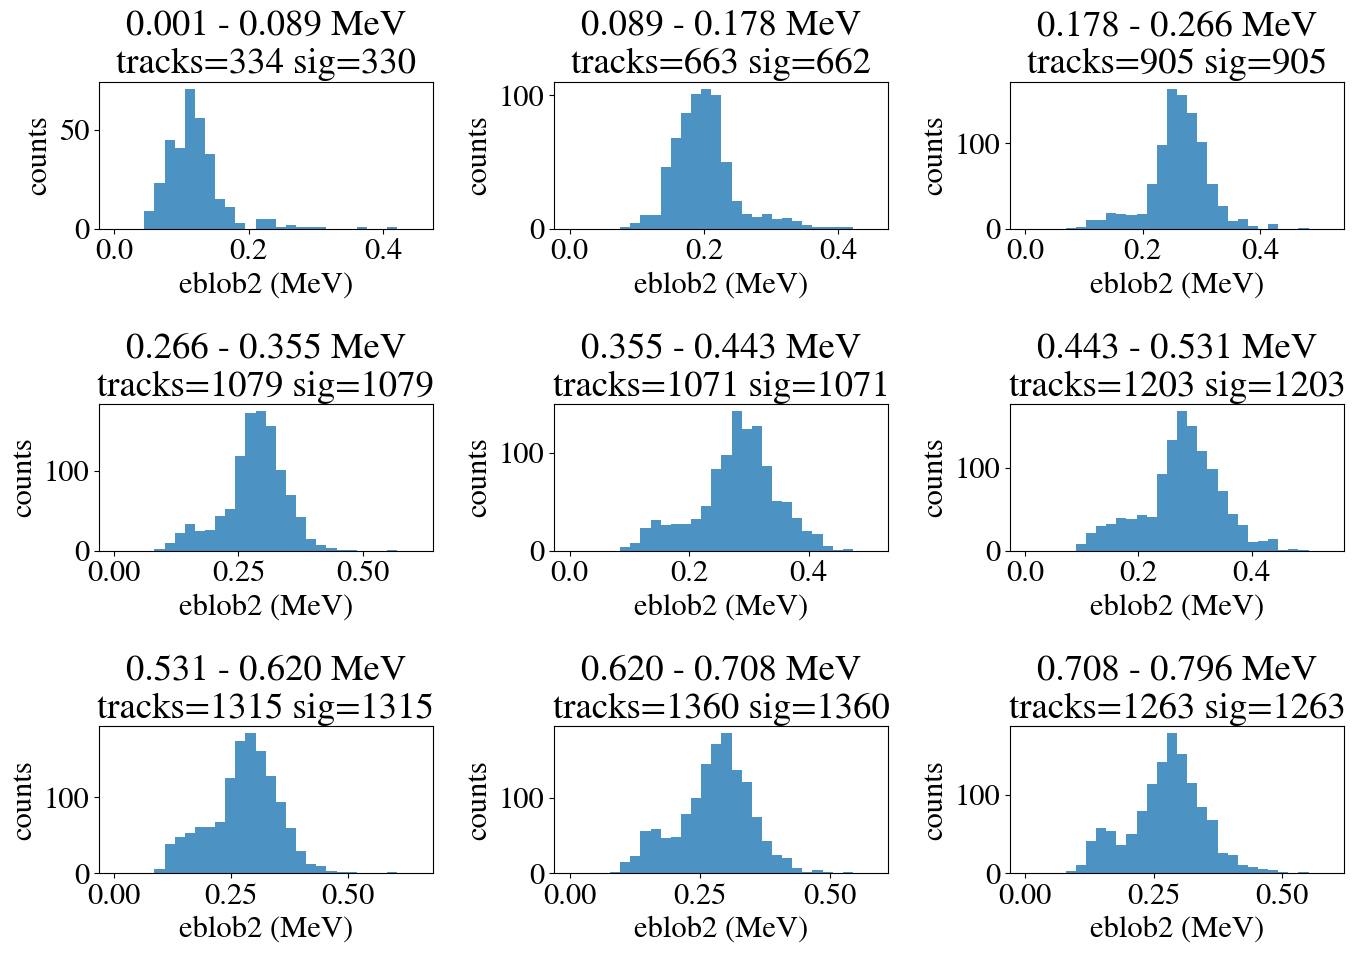

window_idx   kin_low  kin_high  n_events_tracks  n_signal_rows  \
0           0  0.001151  0.089493              334            330   
1           1  0.089493  0.177835              663            662   
2           2  0.177835  0.266177              905            905   
3           3  0.266177  0.354518             1079           1079   
4           4  0.354518  0.442860             1071           1071   
5           5  0.442860  0.531202             1203           1203   
6           6  0.531202  0.619544             1315           1315   
7           7  0.619544  0.707885             1360           1360   
8           8  0.707885  0.796227             1263           1263   

   eblob2_mean  eblob2_median  
0     0.120540       0.113574  
1     0.200045       0.196149  
2     0.261244       0.263300  
3     0.282648       0.288630  
4     0.279895       0.286326  
5     0.276091       0.281964  
6     0.277607       0.283841  
7     0.277151       0.283832  
8     0.273964       0.280935

In [56]:
# extract events in each kin_energy window and inspect their blob2 energies (signal_df.eblob2)
blob2_by_window = []
n_windows = len(kin_space) - 1

fig, axs = plt.subplots(3, 3, figsize=(14, 10))
axs = axs.flatten()

for i in range(n_windows):
    low, high = kin_space[i], kin_space[i+1]
    sel = cut_hdst_minima[(cut_hdst_minima.kin_energy >= low) & (cut_hdst_minima.kin_energy < high)]
    event_ids = sel.event_id.unique()
    sig = signal_df[signal_df.event.isin(event_ids)]
    eblob2 = sig.eblob2.values

    stats = {
        "window_idx": i,
        "kin_low": float(low),
        "kin_high": float(high),
        "n_events_tracks": len(sel),
        "n_signal_rows": len(sig),
        "eblob2_mean": float(np.nan) if eblob2.size == 0 else float(np.mean(eblob2)),
        "eblob2_median": float(np.nan) if eblob2.size == 0 else float(np.median(eblob2)),
    }
    blob2_by_window.append(stats)

    ax = axs[i]
    if eblob2.size:
        ax.hist(eblob2, bins=30, range=(0, eblob2.max()*1.1), color='C0', alpha=0.8)
    else:
        ax.text(0.5, 0.5, "no data", ha='center', va='center')
    ax.set_title(f"{low:.3f} - {high:.3f} MeV\ntracks={stats['n_events_tracks']} sig={stats['n_signal_rows']}")
    ax.set_xlabel("eblob2 (MeV)")
    ax.set_ylabel("counts")

# hide any unused axes (in case windows < 9)
for j in range(n_windows, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# results dataframe for further inspection
blob2_by_window = pd.DataFrame(blob2_by_window)
display(blob2_by_window)